In [1]:
import numpy as np
import matplotlib.pylab as plt

In [37]:
time_stamp = np.array([60 + 35.575, 53.106, 29.314, 20.737])
n_num = [1, 2, 4, 8]

speed_up = time_stamp/(time_stamp[0])
speed_up = 1/speed_up

Text(0.5, 0, 'N proccess')

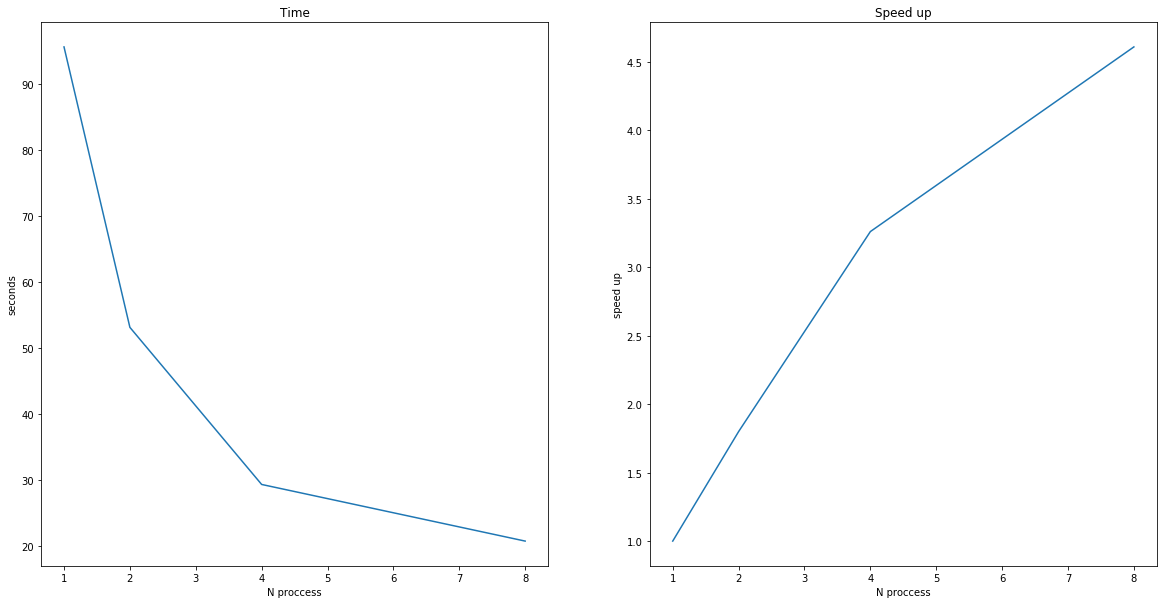

In [41]:
fig, (ax0, ax1) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax0.set_title('Time')
ax0.plot(n_num, time_stamp)
ax0.set_ylabel("seconds")
ax0.set_xlabel("N proccess")

ax1.set_title('Speed up')
ax1.plot(n_num, speed_up)
ax1.set_ylabel("speed up")
ax1.set_xlabel("N proccess")

In [ ]:
	void advection_2d_mpi::solver_small(double *&u, double const &dt, double *&velocities, bool if_y, bool if_h, double t)
	{
		// std::cout << "PACKING" << std::endl;
		for (int i = 0; i < size_of_group; ++i){
			// std::cout << rank << " with " << i << " number of shared triangles: " << interfaces_size[i] << std::endl;
			for (int j = 0; j < interfaces_size[i]; ++j){
				int id = ids_to_send[i][j];

				send_data[i][3*j]   = u[id];
				send_data[i][3*j+1] = velocities[2*id];
				send_data[i][3*j+2] = velocities[2*id + 1];

				// std::cout << j << " triangle ID: " << id << std::endl;
				// std::cout << id << " triangle\n"
				// 		  << u[id] << ", "
				// 		  << velocities[id] << ", "
				// 		  << velocities[id + 1] << ", " << std::endl;
			}
		}
		
		// std::cout << "SENDING" << std::endl;
		MPI_Request request[size_of_group];
		for (int i = 0; i < size_of_group; i++)
		{
			if (i!=rank){
				// std::cout << rank << " ---> " << i << ". " << interfaces_size[i] << std::endl;
				MPI_Isend(send_data[i], 3*interfaces_size[i], MPI_INT, i, rank, MPI_COMM_WORLD, &request[i]);
				MPI_Recv(receive_data[i], 3*interfaces_size[i], MPI_INT, i, i, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
			}
		}
		
		MPI_Barrier(MPI_COMM_WORLD);

		// std::cout << "UNPACKING" << std::endl;
		for (int i = 0; i < size_of_group; i++) {
			for (int j = 0; j < interfaces_size[i]; ++j){
				int id = received_ids[i][j];

				u[id] = receive_data[i][3*j];
				velocities[2*id] = receive_data[i][3*j+1];
				velocities[2*id + 1] = receive_data[i][3*j+2];
			}
		}

		advection_2d::solver_small(u, dt, velocities, if_y, if_h, t);
		MPI_Barrier(MPI_COMM_WORLD);
	}
